In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

Using GPU 0: GeForce RTX 2080 Ti
Driver: 418.56


In [3]:
train_loader = VisionDataset(vision.FashionMNIST, 32, normalize=False)

In [69]:
g = builder([
    nn.Linear(110, 8*4*4),
    nn.BatchNorm1d(8*4*4),
    nn.LeakyReLU(),
    layer.Reshape((-1, 8, 4, 4)),
    AutoConvTransposeNet2d(8, 3, 'vgg', start_filter=128, min_filter=128, preact=False, pooling_type='interpolate'),
    nn.Conv2d(128, 1, 5),
    nn.Sigmoid(),
])  

8 128
128 128
128 128


In [70]:
d = builder([
    layer.ConditionProjection(
        builder([
            nn.Linear(10, 784),
            nn.BatchNorm1d(784),
            nn.LeakyReLU(),
            layer.Reshape((-1, 1, 28, 28)),
        ])
    ),
    AutoConvNet2d(2, 4, 'vgg', start_filter=128, max_filter=128, flatten=True, pooling_type='maxpool', preact=False),
#     Auxiliary(builder([
#         nn.Linear(128, 10),
#         nn.LogSoftmax(-1)
#     ])),
    nn.Linear(128, 1),
#     nn.Sigmoid()
])

2 128
128 128
128 128
128 128


In [74]:
runner = Runner(GANModel(g, d, latent_vector_len=100, condition_vector_len=[10, 10], condition_onehot=True),
                train_loader, 
                None, 
                'rmsprop', 
                GANLoss('wgan'),
                monitor_state='g_loss',
                monitor_mode='min')

In [75]:
runner.init_model('orthogonal')

In [76]:
runner.fit(4)

  Epochs   train_d_loss  train_g_loss 
    1*       -1.8029        0.9322    


    2        -1.9533        1.0258    


    3        -2.0994        1.0482    


    4        -2.1379        1.0480    
    4        -2.1379        1.0480    


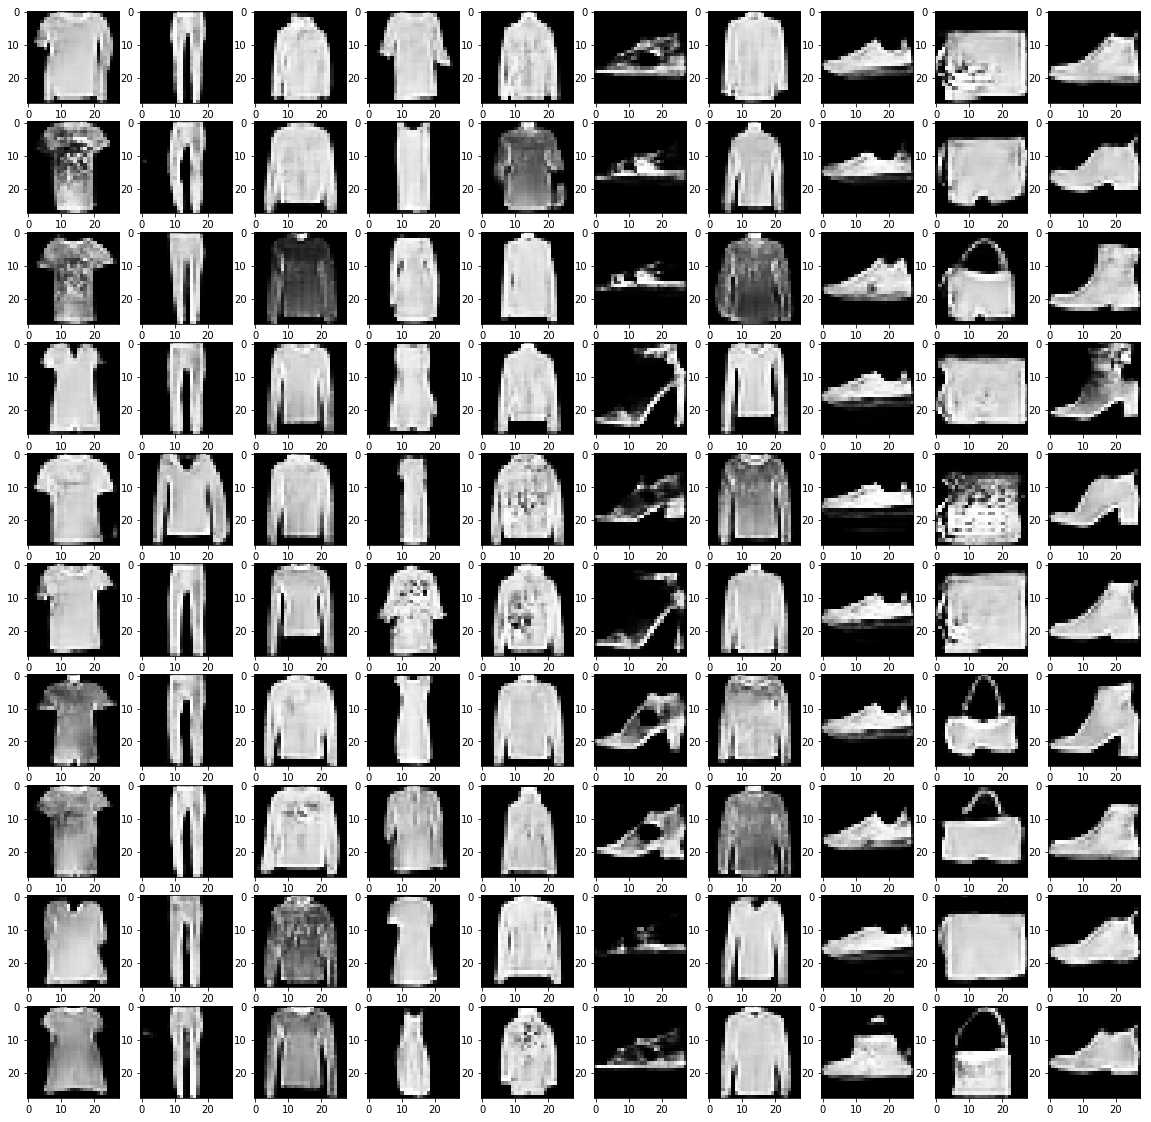

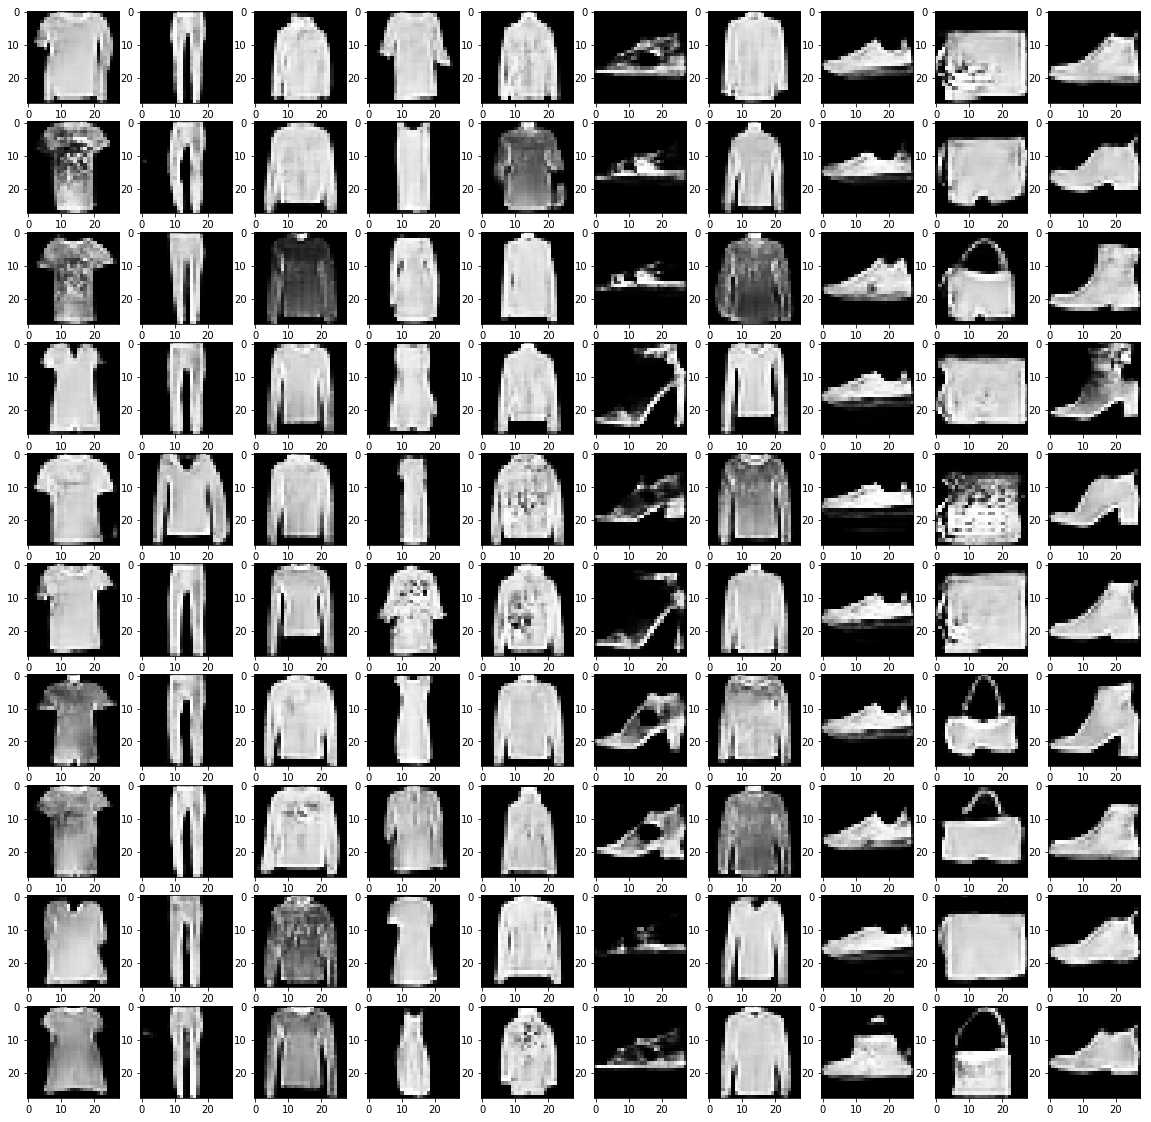

In [77]:
img = runner.model.sample(100, condition_data=list(range(10))*10)
import matplotlib.pyplot as plt
fig, arr = plt.subplots(10, 10, figsize=(20, 20))
for i in range(100):
    r = img[i][0].detach().cpu().numpy()#.transpose(1,2,0)
#     r -= r.min()
#     r /= r.max()
    arr[i//10][i%10].imshow(r, cmap='gray')
plt.show()

In [11]:
runner.report()

Experiment: default
Checkpoints are saved in ./checkpoint/default


Epoch,train_d_loss,train_g_loss,saved
1,2.039397,2.188616,*
2,0.959574,1.383337,*
3,0.919444,1.426104,
4,0.904387,1.362477,*
